In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor # RMSE 
from sklearn.metrics import mean_squared_error

In [7]:
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

# Data Dictionary

## KP Column 설명
- RECV_DEPT_NM : 접수부서 코드 ☆
- RECV_CPLT_DM : 접수완료 일시
- NPA_CL : 경찰청 구분 ☆
- EVT_STAT_CD : 사건 상태 코드
- EVT_CL_CD : 사건종별코드
- RPTER_SEX : 신고 성별 (남 : 1 / 여 : 2 / 불상 : 3)
- HPPN_PNU_ADDR : 발생지점(PNU)
- HPPN_X : 발생좌표X
- HPPN_Y : 발생좌표Y
- SME_EVT_YN : 동일사건여부 

## NPA Column 설명
- RECV_CPLT_DT : 접수완료일자
- RECV_CPLT_TM : 접수완료시간
- NPA_CL : 경찰청 구분 ☆
- EVT_STAT_CD : 사건 상태 코드
- EVT_CL_CD : 사건종별코드
- RPTER_SEX : 신고 성별 (남 : 1 / 여 : 2 / 불상 : 3)
- HPPN_PNU_ADDR : 발생지점(PNU)
- HPPN_X : 발생좌표X
- HPPN_Y : 발생좌표Y
- SME_EVT_YN : 동일사건여부 

In [9]:
KP2020 = pd.read_csv("./KP2020.csv", encoding='cp949')
KP2020

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
...,...,...,...,...,...,...,...,...,...,...
77072,충남청,20/12/31 01:18:16.000000000,19,10,302,2.0,충청남도 보령시 주교면 주교리(행정:주교면) 191-6,126.571002,36.387791,NaN
77073,충남청,20/12/31 01:17:45.000000000,19,10,501,3.0,NaN,NaN,NaN,NaN
77074,충남청,20/12/31 00:13:50.000000000,19,10,604,3.0,충청남도 아산시 온천동(행정:온양1동) 1498,127.000391,36.788411,NaN
77075,대전청,20/12/31 00:49:29.000000000,13,10,302,2.0,대전광역시 서구 갈마동(행정:갈마2동) 975,127.373351,36.348051,Y


In [11]:
KP2021 = pd.read_csv("./KP2021.csv", encoding = 'cp949')
KP2021

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,대전청,21/03/07 00:00:01.000000000,13,10,604,3.0,대전광역시 서구 둔산동 1122,127.373676,36.350975,Y
1,대전청,21/03/07 00:02:13.000000000,13,10,201,1.0,대전광역시 유성구 상대동(원신흥동) 469-9,127.339018,36.347420,NaN
2,대전청,21/03/07 00:00:33.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
3,대전청,21/03/07 00:01:18.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
4,대전청,21/03/07 00:01:43.000000000,13,10,308,1.0,대전광역시 중구 선화동 141-16,127.420455,36.330413,NaN
...,...,...,...,...,...,...,...,...,...,...
2594055,대전청,23/01/12 11:23:09.000000000,13,10,104,1.0,대전광역시 유성구 봉명동 (행정:원신흥동 ) 1016-7,127.344600,36.352272,NaN
2594056,충남청,23/01/16 11:59:47.000000000,19,10,307,2.0,충청남도 서산시 음암면 부장리(음암면 ) 560-4,126.514047,36.785626,NaN
2594057,충남청,23/01/16 11:58:54.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN
2594058,충남청,23/01/14 01:00:47.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN


In [12]:
NPA2020 = pd.read_csv("./NPA2020.csv", encoding = 'cp949')
NPA2020

,RECV_CPLT_DT,RECV_CPLT_TM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,20200101,7,13,10,501,2,대전광역시 중구 목동(행정:목동) 360,127.409270,36.333010,Y
1,20200101,132,13,10,501,1,대전광역시 중구 대흥동(대흥동) 499-1,127.421295,36.325575,NaN
2,20200101,39,13,10,501,1,NaN,127.404663,36.341685,NaN
3,20200101,110,13,10,601,3,NaN,0.000000,0.000000,NaN
4,20200101,342,13,10,601,1,NaN,127.404663,36.341685,NaN
...,...,...,...,...,...,...,...,...,...,...
1178239,20201122,3505,19,10,501,1,,NaN,NaN,
1178240,20201122,5213,13,10,601,,,127.404663,36.341685,
1178241,20201122,4627,19,10,601,1,,NaN,NaN,Y
1178242,20201122,5246,19,5,301,1,충청남도 보령시 신흑동(행정:대천5동),126.516040,36.305619,


In [13]:
NPA2020['NPA_CL'].unique

<bound method Series.unique of 0          13
1          13
2          13
3          13
4          13
           ..
1178239    19
1178240    13
1178241    19
1178242    19
1178243    13
Name: NPA_CL, Length: 1178244, dtype: int64>

In [14]:
NPA2020['RPTER_SEX'].unique()

array(['2', '1', '3', '{', ' '], dtype=object)

In [15]:
KP2020.isna().sum()

RECV_DEPT_NM         0
RECV_CPLT_DM         0
NPA_CL               0
EVT_STAT_CD          0
EVT_CL_CD            0
RPTER_SEX         2419
HPPN_PNU_ADDR    29272
HPPN_X           16764
HPPN_Y           16764
SME_EVT_YN       63635
dtype: int64

In [16]:
KP2021.isna().sum()

RECV_DEPT_NM           0
RECV_CPLT_DM           0
NPA_CL                 0
EVT_STAT_CD            0
EVT_CL_CD              0
RPTER_SEX          23894
HPPN_PNU_ADDR    1072094
HPPN_X            694401
HPPN_Y            694401
SME_EVT_YN       2079123
dtype: int64

In [17]:
NPA2020.isna().sum()

RECV_CPLT_DT          0
RECV_CPLT_TM          0
NPA_CL                0
EVT_STAT_CD           0
EVT_CL_CD             0
RPTER_SEX             0
HPPN_OLD_ADDR    258593
HPPN_X           101653
HPPN_Y           101653
SME_EVT_YN       596801
dtype: int64

- RECV_DEPT_NM : 버려도 될 듯
- RPTER_SEX : INT(FLOAT)로 통일
- HPPN_PNU_ADDR : 버려도 될 듯
- SEX : NAN값 -> 3으로 바꾸기

- HPPN_X, HPPN_Y : 위도 경도 결측치
- SME_EVT_YN : 결측치 N으로 바꾸기

- RECV_CPLT_DT, RECV_CPLT_TM : 년도 / 월 / 일 / 시 / 분 / 초 단위로 나누기
- RECV_CPLT_DM : 년도 / 월 / 일 / 시 / 분 / 초 단위로 나누기
- 신무진

- EVT_CL_CD : 종별 코드 → 보이스피싱 / 교통사고 분류 : 4인거만 찾아내기

In [18]:
x = NPA2020[NPA2020['EVT_CL_CD'] < 500]
y = x[x['EVT_CL_CD'] > 400]
NPA2020 = y

x = KP2021[KP2021['EVT_CL_CD'] < 500]
y = x[x['EVT_CL_CD'] > 400]
KP2021 = y

x = KP2020[KP2020['EVT_CL_CD'] < 500]
y = x[x['EVT_CL_CD'] > 400]
KP2020 = y

KP2020.drop('RECV_DEPT_NM', axis = 1, inplace = True)
KP2021.drop('RECV_DEPT_NM', axis = 1, inplace = True)
KP2020.drop('HPPN_PNU_ADDR', axis = 1, inplace = True)
KP2021.drop('HPPN_PNU_ADDR', axis = 1, inplace = True)
NPA2020.drop('HPPN_OLD_ADDR', axis = 1, inplace = True)
#드롭

NPA2020 = NPA2020.drop([42819, 250145, 551827, 609589, 659384, 767378, 802443, 838056, 1044961])

NPA2020["RPTER_SEX"] = NPA2020["RPTER_SEX"].fillna(3).astype(int)
KP2020["RPTER_SEX"] = KP2020["RPTER_SEX"].fillna(3).astype(int)
KP2021["RPTER_SEX"] = KP2021["RPTER_SEX"].fillna(3).astype(int)

#SEX : NAN값 -> 3으로 바꾸기

In [19]:
KP2020['RECV_CPLT_DM'] = KP2020['RECV_CPLT_DM'].astype(str)

def add_20(a):
    return '20'+ a

KP2020['TIME'] = KP2020['RECV_CPLT_DM'].apply(add_20)

# 년
KP2020['YEAR'] =  pd.to_datetime(KP2020['TIME']).dt.year

# 월
KP2020['MONTH'] =  pd.to_datetime(KP2020['TIME']).dt.month

# 일
KP2020['DAY'] =  pd.to_datetime(KP2020['TIME']).dt.day

# 시
KP2020['HOUR'] =  pd.to_datetime(KP2020['TIME']).dt.hour

# 분
KP2020['MINUTE'] =  pd.to_datetime(KP2020['TIME']).dt.minute

# 초
KP2020['SECOND'] =  pd.to_datetime(KP2020['TIME']).dt.second

# 원래 시간 컬럼 삭제
KP2020 = KP2020.drop(['RECV_CPLT_DM','TIME'], axis = 1)

KP2021['RECV_CPLT_DM'] = KP2021['RECV_CPLT_DM'].astype(str)

KP2021['TIME'] = KP2021['RECV_CPLT_DM'].apply(add_20)

# 년
KP2021['YEAR'] =  pd.to_datetime(KP2021['TIME']).dt.year

# 월
KP2021['MONTH'] =  pd.to_datetime(KP2021['TIME']).dt.month

# 일
KP2021['DAY'] =  pd.to_datetime(KP2021['TIME']).dt.day

# 시
KP2021['HOUR'] =  pd.to_datetime(KP2021['TIME']).dt.hour

# 분
KP2021['MINUTE'] =  pd.to_datetime(KP2021['TIME']).dt.minute

# 초
KP2021['SECOND'] =  pd.to_datetime(KP2021['TIME']).dt.second

# 원래 시간 컬럼 삭제
KP2021= KP2021.drop(['RECV_CPLT_DM','TIME'], axis = 1)


NPA2020['RECV_CPLT_DT'] = NPA2020['RECV_CPLT_DT'].astype(str)


def silce_year(a):
    return a[:4]
def silce_month(a):
    return a[4:6]
def silce_day(a):
    return a[6:]

# 년
NPA2020['YEAR'] = NPA2020['RECV_CPLT_DT'].apply(silce_year)
NPA2020['YEAR']
# 월
NPA2020['MONTH'] = NPA2020['RECV_CPLT_DT'].apply(silce_month)
NPA2020['MONTH']
# 일
NPA2020['DAY'] = NPA2020['RECV_CPLT_DT'].apply(silce_day)
NPA2020['DAY']

NPA2020['RECV_CPLT_TM'] = NPA2020['RECV_CPLT_TM'].astype(str)


def add_00(a):
    if len(a) == 6:
        return a
    elif len(a) == 5:
        return '0' + a
    elif len(a) == 4:
        return '0' * 2 + a
    elif len(a) == 3:
        return '0' * 3 + a
    elif len(a) == 2:
        return '0' * 4 + a
    else:
        return '0' * 5 + a

NPA2020['TIME'] = NPA2020['RECV_CPLT_TM'].apply(add_00)
NPA2020['TIME']

def silce_hour(a):
    return a[:2]

def silce_min(a):
    return a[2:4]

def silce_sec(a):
    return a[4:]

# 시
NPA2020['HOUR'] = NPA2020['TIME'].apply(silce_hour)
NPA2020['HOUR']

# 분
NPA2020['MINUTE'] = NPA2020['TIME'].apply(silce_min)
NPA2020['MINUTE']

# 초
NPA2020['SECOND'] = NPA2020['TIME'].apply(silce_sec)
NPA2020['SECOND']

# 원래 시간 컬럼 삭제
NPA2020 = NPA2020.drop(['TIME', 'RECV_CPLT_TM', 'RECV_CPLT_DT'], axis = 1)

In [20]:
NPA2020[NPA2020['HPPN_X'].isna()]['HPPN_Y'].sum()

0.0

In [21]:
NPA2020[NPA2020['HPPN_Y'].isna()]['HPPN_X'].sum()

0.0

In [22]:
KP2021.isna().sum()

NPA_CL              0
EVT_STAT_CD         0
EVT_CL_CD           0
RPTER_SEX           0
HPPN_X           1733
HPPN_Y           1733
SME_EVT_YN     211361
YEAR                0
MONTH               0
DAY                 0
HOUR                0
MINUTE              0
SECOND              0
dtype: int64

In [23]:
KP2021[KP2021['HPPN_X'].isna()]['HPPN_Y'].sum()

0.0

In [24]:
KP2021[KP2021['HPPN_Y'].isna()]['HPPN_X'].sum()

0.0

In [25]:
KP2020.isna().sum()

NPA_CL            0
EVT_STAT_CD       0
EVT_CL_CD         0
RPTER_SEX         0
HPPN_X          133
HPPN_Y          133
SME_EVT_YN     7438
YEAR              0
MONTH             0
DAY               0
HOUR              0
MINUTE            0
SECOND            0
dtype: int64

In [26]:
KP2020[KP2020['HPPN_X'].isna()]['HPPN_Y'].sum()

0.0

In [27]:
KP2020[KP2020['HPPN_Y'].isna()]['HPPN_X'].sum()

0.0

In [28]:
# 위도, 경도 결측치 행 제거
KP2020 = KP2020.dropna(subset = ['HPPN_X','HPPN_Y'])
KP2021 = KP2021.dropna(subset = ['HPPN_X','HPPN_Y'])
NPA2020 = NPA2020.dropna(subset = ['HPPN_X','HPPN_Y'])

# 결측치 N으로 바꾸기
KP2020['SME_EVT_YN'] = KP2020['SME_EVT_YN'].fillna('N')
KP2021['SME_EVT_YN'] = KP2021['SME_EVT_YN'].fillna('N')
NPA2020['SME_EVT_YN'] = NPA2020['SME_EVT_YN'].fillna('N')

In [29]:
NPA2020.isna().sum()

NPA_CL         0
EVT_STAT_CD    0
EVT_CL_CD      0
RPTER_SEX      0
HPPN_X         0
HPPN_Y         0
SME_EVT_YN     0
YEAR           0
MONTH          0
DAY            0
HOUR           0
MINUTE         0
SECOND         0
dtype: int64

In [30]:
KP2021.isna().sum()

NPA_CL         0
EVT_STAT_CD    0
EVT_CL_CD      0
RPTER_SEX      0
HPPN_X         0
HPPN_Y         0
SME_EVT_YN     0
YEAR           0
MONTH          0
DAY            0
HOUR           0
MINUTE         0
SECOND         0
dtype: int64

In [31]:
KP2020.isna().sum()

NPA_CL         0
EVT_STAT_CD    0
EVT_CL_CD      0
RPTER_SEX      0
HPPN_X         0
HPPN_Y         0
SME_EVT_YN     0
YEAR           0
MONTH          0
DAY            0
HOUR           0
MINUTE         0
SECOND         0
dtype: int64

In [32]:
def N_rep(x):
    if x == ' ':
        return 'N'
    else:
        return x

In [33]:
NPA2020['SME_EVT_YN'] = NPA2020['SME_EVT_YN'].apply(N_rep)
NPA2020['SME_EVT_YN']

38         N
41         N
54         N
66         N
117        N
          ..
1178083    N
1178086    Y
1178143    N
1178173    Y
1178234    N
Name: SME_EVT_YN, Length: 140958, dtype: object

In [34]:
NPA2020['SME_EVT_YN'].value_counts()

N    121179
Y     19779
Name: SME_EVT_YN, dtype: int64

In [35]:
KP2021

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
14,19,10,406,1,127.107500,36.811944,N,2021,3,7,0,2,48
20,19,10,402,1,127.150988,36.811792,Y,2021,3,7,0,9,4
23,13,10,401,2,127.371854,36.341961,N,2021,3,7,0,7,54
26,13,10,401,1,127.339334,36.346899,N,2021,3,7,0,15,27
44,19,10,403,2,127.090733,36.453397,N,2021,3,7,0,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593994,13,10,401,1,127.384284,36.334507,N,2023,1,15,20,1,39
2594002,19,10,401,1,126.262393,36.751467,N,2023,1,16,21,26,56
2594006,19,10,403,2,127.147678,36.789125,N,2023,1,14,1,2,48
2594019,13,10,401,1,127.433785,36.450725,N,2023,1,14,17,35,38


In [36]:
KP2020

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
4,19,10,401,2,127.137160,36.826718,N,2020,12,1,8,17,50
7,13,10,406,1,127.341551,36.353696,N,2020,12,1,3,24,26
8,19,10,402,1,127.136142,36.917900,N,2020,12,1,7,37,18
9,13,10,401,1,127.447545,36.306724,N,2020,12,1,7,8,44
10,13,10,401,2,127.447175,36.306694,N,2020,12,1,7,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77024,19,10,406,1,126.298968,36.747649,Y,2020,12,31,0,16,14
77036,13,10,401,1,127.428343,36.324386,N,2020,12,31,1,8,43
77066,19,10,406,1,126.298968,36.747649,Y,2020,12,31,0,26,16
77068,13,10,401,1,127.369099,36.312971,N,2020,12,31,1,17,1


In [52]:
c = pd.concat([KP2020, KP2021])
data = pd.concat([c, NPA2020])
data

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
4,19,10,401,2,127.137160,36.826718,N,2020,12,1,8,17,50
7,13,10,406,1,127.341551,36.353696,N,2020,12,1,3,24,26
8,19,10,402,1,127.136142,36.917900,N,2020,12,1,7,37,18
9,13,10,401,1,127.447545,36.306724,N,2020,12,1,7,8,44
10,13,10,401,2,127.447175,36.306694,N,2020,12,1,7,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178083,13,7,406,1,127.404540,36.325219,N,2020,11,22,00,20,07
1178086,13,5,401,1,127.446090,36.320140,Y,2020,11,22,00,40,08
1178143,19,5,406,3,127.107617,36.813773,N,2020,11,22,00,57,19
1178173,13,5,401,1,127.446090,36.320140,Y,2020,11,22,00,37,53


In [53]:
data['YEAR'] = data['YEAR'].astype(int)
data['MONTH'] = data['MONTH'].astype(int)
data['DAY'] = data['DAY'].astype(int)
data['HOUR'] = data['HOUR'].astype(int)
data['MINUTE'] = data['MINUTE'].astype(int)
data['SECOND'] = data['SECOND'].astype(int)

## data column 설명

- NPA_CL : 경찰청 구분 ☆
- EVT_STAT_CD : 사건 상태 코드
- EVT_CL_CD : 사건종별코드
- RPTER_SEX : 신고 성별 (남 : 1 / 여 : 2 / 불상 : 3)
- HPPN_X : 발생좌표X
- HPPN_Y : 발생좌표Y
- SME_EVT_YN : 동일사건여부 
- YEAR : 접수 완료 연도
- MONTH : 접수 완료 월
- DAY : 접수 완료 일
- HOUR : 접수 완료 시
- MINUTE : 접수 완료 분
- SECOND : 접수 완료 초

# EDA

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426761 entries, 4 to 1178234
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   NPA_CL       426761 non-null  int64  
 1   EVT_STAT_CD  426761 non-null  int64  
 2   EVT_CL_CD    426761 non-null  int64  
 3   RPTER_SEX    426761 non-null  int32  
 4   HPPN_X       426761 non-null  float64
 5   HPPN_Y       426761 non-null  float64
 6   SME_EVT_YN   426761 non-null  object 
 7   YEAR         426761 non-null  int32  
 8   MONTH        426761 non-null  int32  
 9   DAY          426761 non-null  int32  
 10  HOUR         426761 non-null  int32  
 11  MINUTE       426761 non-null  int32  
 12  SECOND       426761 non-null  int32  
dtypes: float64(2), int32(7), int64(3), object(1)
memory usage: 34.2+ MB


In [55]:
count_by_NPA_CL = data['NPA_CL'].value_counts()
count_by_NPA_CL

19    248118
13    156473
31     16662
18      2353
15      1978
20       679
21       143
8        116
11        73
16        35
22        34
10        19
17        18
23        18
9         14
12        12
24         9
14         7
Name: NPA_CL, dtype: int64

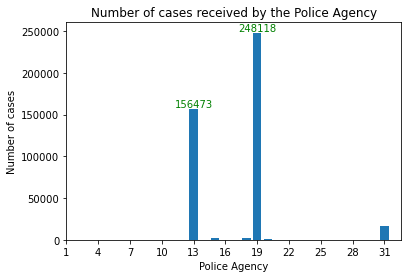

In [56]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(count_by_NPA_CL.index, count_by_NPA_CL.values)
plt.title('Number of cases received by the Police Agency')
plt.xlabel('Police Agency')
plt.ylabel('Number of cases')
plt.xticks(range(1,32,3))
for idx, val in count_by_NPA_CL[0:2].items():
    plt.annotate(val, (idx,val), xytext = (0,2), textcoords='offset points', fontsize=10, ha='center',color='green')
plt.show()

- 충남청 : 19, 대전청 : 13 의 사건 접수 수가 압도적으로 많음
- 대전, 충남, 세종시의 치안 안전 데이터에 기반하였기 때문인 듯

In [57]:
chungnam = data[data['NPA_CL'] == 19]
chungnam_EVT_CL = chungnam['EVT_CL_CD']
count_by_chungnam = chungnam_EVT_CL.value_counts()
count_by_chungnam

401    147766
406     45831
402     32604
403     21874
405        23
404        20
Name: EVT_CL_CD, dtype: int64

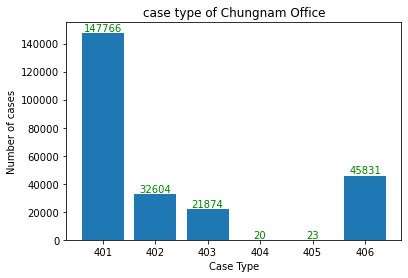

In [58]:
plt.bar(count_by_chungnam.index, count_by_chungnam.values)
plt.title('case type of Chungnam Office')
plt.xlabel('Case Type')
plt.ylabel('Number of cases')
for idx, val in count_by_chungnam[::].items():
    plt.annotate(val, (idx,val), xytext = (0,2), textcoords='offset points', fontsize=10, ha='center',color='green')
plt.show()

충남청의 사건 종별 발생 수를 나타냄
- 401 : 교통사고
- 406 : 음주운전
- 402 : 교통불편
- 403 : 교통위반

In [59]:
daejeon = data[data['NPA_CL'] == 13]
daejeon_EVT_CL = daejeon['EVT_CL_CD']
count_by_daejeon = daejeon_EVT_CL.value_counts()
count_by_daejeon

401    103472
402     23809
406     18201
403     10973
405        17
404         1
Name: EVT_CL_CD, dtype: int64

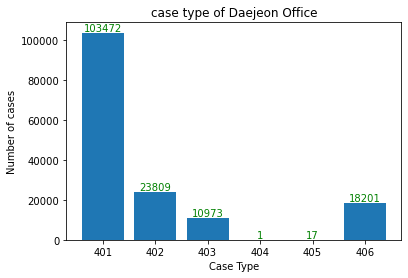

In [60]:
plt.bar(count_by_daejeon.index, count_by_daejeon.values)
plt.title('case type of Daejeon Office')
plt.xlabel('Case Type')
plt.ylabel('Number of cases')
for idx, val in count_by_daejeon[::].items():
    plt.annotate(val, (idx,val), xytext = (0,2), textcoords='offset points', fontsize=10, ha='center',color='green')
plt.show()

대전청의 사건 종별 발생 수를 나타냄
- 401 : 교통사고
- 402 : 교통불편
- 406 : 음주운전
- 403 : 교통위반

In [62]:
count_by_year_chungnam = chungnam['YEAR'].value_counts()
count_by_year_chungnam

2020    95654
2022    78931
2021    70233
2023     3300
Name: YEAR, dtype: int64

In [63]:
chungnam['YEAR'].unique()

array([2020, 2021, 2022, 2023])

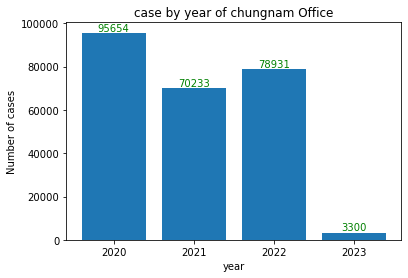

In [92]:
plt.bar(count_by_year_chungnam.index, count_by_year_chungnam.values)
plt.title('case by year of chungnam Office')
plt.xlabel('year')
plt.ylabel('Number of cases')
plt.xticks(range(2020,2024,1))
for idx, val in count_by_year_chungnam[::].items():
    plt.annotate(val, (idx,val), xytext = (0,2), textcoords='offset points', fontsize=10, ha='center',color='green')
plt.show()

In [64]:
count_by_month_chungnam = chungnam['MONTH'].value_counts()
count_by_month_chungnam

9     23870
10    23868
7     22719
8     22704
5     22165
6     21891
1     20674
11    20179
4     19384
3     17403
12    17370
2     15891
Name: MONTH, dtype: int64

In [65]:
chungnam['MONTH'].unique()

array([12,  3,  1,  2,  4, 10,  9,  5,  6,  8,  7, 11])

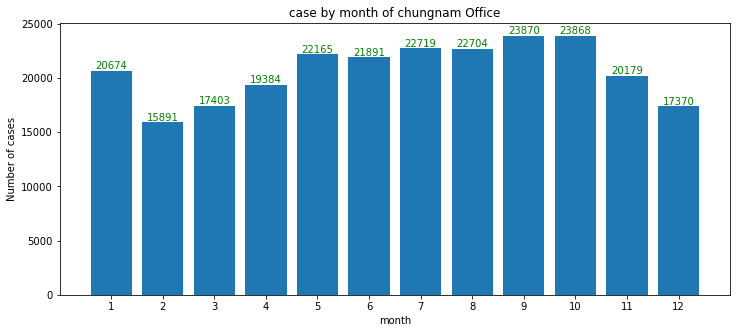

In [96]:
plt.figure(figsize=(12,5))
plt.bar(count_by_month_chungnam.index, count_by_month_chungnam.values)
plt.title('case by month of chungnam Office')
plt.xlabel('month')
plt.ylabel('Number of cases')
plt.xticks(range(1,13,1))
for idx, val in count_by_month_chungnam[::].items():
    plt.annotate(val, (idx,val), xytext = (0,2), textcoords='offset points', fontsize=10, ha='center',color='green')
plt.show()

In [97]:
count_by_hour_chungnam = chungnam['HOUR'].value_counts()
count_by_hour_chungnam

18    16906
17    15495
16    14333
15    14294
14    14211
21    13538
19    13245
13    13221
20    12963
22    12816
12    12076
11    11880
10    11173
23    10456
9     10232
8     10139
0      9234
1      6751
7      6700
2      4803
6      4121
3      3649
4      2957
5      2925
Name: HOUR, dtype: int64

In [98]:
chungnam['HOUR'].unique()

array([ 8,  7,  1,  2,  0, 14, 12,  3, 15, 13, 11, 10,  9, 17, 16,  6,  4,
        5, 20, 21, 18, 19, 22, 23])

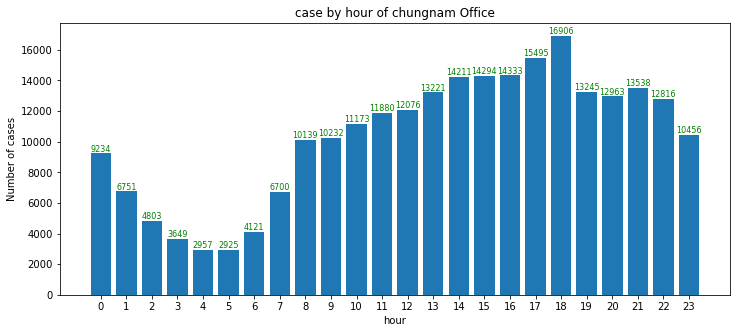

In [100]:
plt.figure(figsize=(12,5))
plt.bar(count_by_hour_chungnam.index, count_by_hour_chungnam.values)
plt.title('case by hour of chungnam Office')
plt.xlabel('hour')
plt.ylabel('Number of cases')
plt.xticks(range(0,24,1))
for idx, val in count_by_hour_chungnam[::].items():
    plt.annotate(val, (idx,val), xytext = (0,2), textcoords='offset points', fontsize=8, ha='center',color='green')
plt.show()

In [101]:
count_by_year_daejeon = daejeon['YEAR'].value_counts()
count_by_year_daejeon

2020    53827
2022    50938
2021    49357
2023     2351
Name: YEAR, dtype: int64

In [102]:
daejeon['YEAR'].unique()

array([2020, 2021, 2022, 2023])

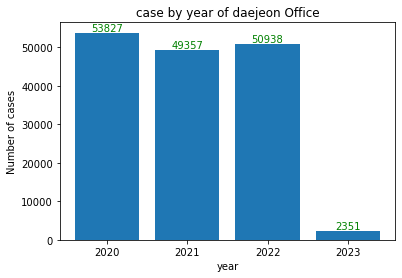

In [103]:
plt.bar(count_by_year_daejeon.index, count_by_year_daejeon.values)
plt.title('case by year of daejeon Office')
plt.xlabel('year')
plt.ylabel('Number of cases')
plt.xticks(range(2020,2024,1))
for idx, val in count_by_year_daejeon[::].items():
    plt.annotate(val, (idx,val), xytext = (0,2), textcoords='offset points', fontsize=10, ha='center',color='green')
plt.show()

In [104]:
count_by_month_daejeon = daejeon['MONTH'].value_counts()
count_by_month_daejeon

9     14806
10    14315
7     14301
5     13633
1     13598
8     13596
6     13439
11    12683
12    12337
4     11964
3     11525
2     10276
Name: MONTH, dtype: int64

In [105]:
daejeon['MONTH'].unique()

array([12,  3,  1,  2,  4, 10,  9,  5,  6,  8,  7, 11])

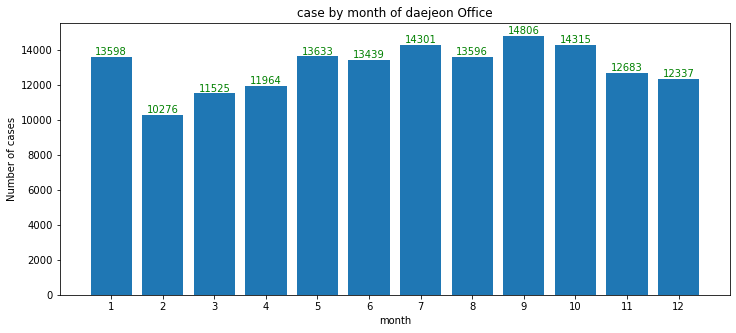

In [106]:
plt.figure(figsize=(12,5))
plt.bar(count_by_month_daejeon.index, count_by_month_daejeon.values)
plt.title('case by month of daejeon Office')
plt.xlabel('month')
plt.ylabel('Number of cases')
plt.xticks(range(1,13,1))
for idx, val in count_by_month_daejeon[::].items():
    plt.annotate(val, (idx,val), xytext = (0,2), textcoords='offset points', fontsize=10, ha='center',color='green')
plt.show()

In [107]:
count_by_hour_daejeon = daejeon['HOUR'].value_counts()
count_by_hour_daejeon

18    11527
17    10326
16     9391
15     9026
14     8896
19     8831
13     8478
21     7803
12     7779
20     7678
11     7626
22     7611
10     7471
9      7054
8      6521
23     6044
0      5185
1      4009
7      3683
2      3058
6      2452
3      2350
4      1889
5      1785
Name: HOUR, dtype: int64

In [108]:
daejeon['HOUR'].unique()

array([ 3,  7,  1,  0, 15, 12, 14, 13, 11, 10,  9,  8, 16, 17,  6,  5, 21,
       19, 18, 20, 22,  2,  4, 23])

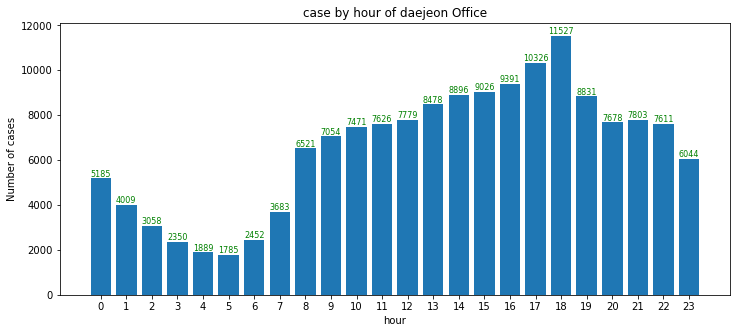

In [109]:
plt.figure(figsize=(12,5))
plt.bar(count_by_hour_daejeon.index, count_by_hour_daejeon.values)
plt.title('case by hour of daejeon Office')
plt.xlabel('hour')
plt.ylabel('Number of cases')
plt.xticks(range(0,24,1))
for idx, val in count_by_hour_daejeon[::].items():
    plt.annotate(val, (idx,val), xytext = (0,2), textcoords='offset points', fontsize=8, ha='center',color='green')
plt.show()

In [110]:
chungnam['HPPN_X'].describe()

count    248118.000000
mean        125.322871
std          14.287035
min           0.000000
25%         126.677958
50%         127.068175
75%         127.141199
max         129.418366
Name: HPPN_X, dtype: float64

In [111]:
chungnam['HPPN_Y'].describe()

count    248118.000000
mean         36.194962
std           4.132548
min           0.000000
25%          36.483283
50%          36.776440
75%          36.823257
max          38.210578
Name: HPPN_Y, dtype: float64

In [112]:
chungnam['HPPN_X'].value_counts()

0.000000      3182
127.137808     202
127.180888     161
127.108062     153
127.153932     135
              ... 
126.632310       1
126.351496       1
127.053838       1
127.158295       1
127.173382       1
Name: HPPN_X, Length: 157778, dtype: int64

In [113]:
chungnam['HPPN_Y'].value_counts()

0.000000     3182
36.830373     202
36.855407     160
36.817772     150
36.798760     137
             ... 
36.890958       1
36.925118       1
36.061955       1
36.802349       1
36.841991       1
Name: HPPN_Y, Length: 158055, dtype: int64

In [114]:
chungnam_v1 = chungnam[(chungnam['HPPN_X'] > 126) &  (chungnam['HPPN_X'] < 127.4) & (chungnam['HPPN_Y'] > 36) & (chungnam['HPPN_Y'] < 37)]
chungnam_v1

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
4,19,10,401,2,127.137160,36.826718,N,2020,12,1,8,17,50
8,19,10,402,1,127.136142,36.917900,N,2020,12,1,7,37,18
11,19,10,402,1,126.807222,36.395000,N,2020,12,1,8,21,8
28,19,10,406,1,127.055248,36.773785,Y,2020,12,1,1,8,51
31,19,10,401,1,126.412290,36.967612,N,2020,12,1,1,36,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178016,19,10,406,1,127.159432,36.800444,N,2020,11,22,0,2,49
1178057,19,5,406,1,127.125278,36.919444,N,2020,11,22,0,10,47
1178067,19,5,406,1,127.005016,36.784637,N,2020,11,22,0,53,35
1178143,19,5,406,3,127.107617,36.813773,N,2020,11,22,0,57,19


In [115]:
chungnam_v1.describe()

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
count,236606.0,236606.000000,236606.000000,236606.000000,236606.000000,236606.000000,236606.000000,236606.000000,236606.000000,236606.000000,236606.000000,236606.000000
mean,19.0,9.983825,402.235607,1.398612,126.937302,36.674615,2020.979007,6.684205,15.634798,13.653496,29.387281,29.446079
std,0.0,0.271752,1.899125,0.673383,0.275013,0.229452,0.867052,3.341850,8.760033,6.293040,17.314533,17.313825
min,19.0,2.000000,401.000000,1.000000,126.124849,36.000009,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,19.0,10.000000,401.000000,1.000000,126.682715,36.518584,2020.000000,4.000000,8.000000,10.000000,14.000000,15.000000
50%,19.0,10.000000,401.000000,1.000000,127.064066,36.778642,2021.000000,7.000000,16.000000,15.000000,29.000000,29.000000
75%,19.0,10.000000,403.000000,2.000000,127.139167,36.824414,2022.000000,10.000000,23.000000,19.000000,44.000000,45.000000
max,19.0,10.000000,406.000000,3.000000,127.399971,36.999990,2023.000000,12.000000,31.000000,23.000000,59.000000,59.000000


In [116]:
longitude_of_chungnam_v1 = chungnam_v1['HPPN_X'].value_counts()
longitude_of_chungnam_v1

127.137808    202
127.180888    161
127.108062    153
127.119179    135
127.153932    135
             ... 
126.776044      1
127.161375      1
127.099370      1
126.664035      1
127.173382      1
Name: HPPN_X, Length: 151437, dtype: int64

In [117]:
latitude_of_chungnam_v1 = chungnam_v1['HPPN_Y'].value_counts()
latitude_of_chungnam_v1

36.830373    202
36.855407    160
36.817772    150
36.798760    137
36.803464    135
            ... 
36.803014      1
36.836309      1
36.734624      1
36.892770      1
36.841991      1
Name: HPPN_Y, Length: 151799, dtype: int64

- 충남 교통과 관련 사건 수가 가장 많은 곳은 위도 36.830373, 경도 127.137808인 충남 천안시 서북구 두정동으로 확인 된다.

In [118]:
daejeon['HPPN_X'].describe()

count    156473.000000
mean        127.135982
std           5.692165
min           0.000000
25%         127.367937
50%         127.392930
75%         127.423058
max         129.435259
Name: HPPN_X, dtype: float64

In [119]:
daejeon['HPPN_Y'].describe()

count    156473.000000
mean         36.275687
std           1.625159
min           0.000000
25%          36.326240
50%          36.344981
75%          36.358700
max          38.211177
Name: HPPN_Y, dtype: float64

In [120]:
daejeon['HPPN_X'].value_counts()

127.404663    8065
0.000000       313
127.353322     224
127.327019     171
127.432065     147
              ... 
127.436053       1
127.330131       1
127.330658       1
127.378988       1
127.339844       1
Name: HPPN_X, Length: 85409, dtype: int64

In [121]:
daejeon['HPPN_Y'].value_counts()

36.341685    8065
0.000000      313
36.305138     234
36.366825     171
36.347467     156
             ... 
36.319073       1
36.321165       1
36.335132       1
36.327836       1
36.358391       1
Name: HPPN_Y, Length: 83341, dtype: int64

In [122]:
daejeon_v1 = daejeon[(daejeon['HPPN_X'] > 127) &  (daejeon['HPPN_X'] < 127.55) & (daejeon['HPPN_Y'] > 36) & (daejeon['HPPN_Y'] < 36.7)]
daejeon_v1

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
7,13,10,406,1,127.341551,36.353696,N,2020,12,1,3,24,26
9,13,10,401,1,127.447545,36.306724,N,2020,12,1,7,8,44
10,13,10,401,2,127.447175,36.306694,N,2020,12,1,7,9,20
53,13,10,401,1,127.447390,36.324597,N,2020,12,1,1,39,3
121,13,10,403,1,127.320655,36.384467,N,2020,12,1,7,33,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178035,13,5,401,1,127.347209,36.357588,N,2020,11,22,0,3,22
1178051,13,5,401,1,127.339844,36.358391,N,2020,11,22,0,54,10
1178083,13,7,406,1,127.404540,36.325219,N,2020,11,22,0,20,7
1178086,13,5,401,1,127.446090,36.320140,Y,2020,11,22,0,40,8


In [123]:
daejeon_v1.describe()

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
count,155585.0,155585.000000,155585.000000,155585.000000,155585.000000,155585.000000,155585.000000,155585.000000,155585.000000,155585.000000,155585.000000,155585.000000
mean,13.0,9.992679,401.873760,1.383347,127.391145,36.347571,2021.014179,6.640852,15.670302,13.656734,29.443288,29.476248
std,0.0,0.186657,1.604129,0.647507,0.040798,0.036312,0.853770,3.390448,8.772771,6.132756,17.287163,17.301668
min,13.0,2.000000,401.000000,1.000000,127.012243,36.048514,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,13.0,10.000000,401.000000,1.000000,127.368306,36.326402,2020.000000,4.000000,8.000000,10.000000,15.000000,15.000000
50%,13.0,10.000000,401.000000,1.000000,127.393097,36.345023,2021.000000,7.000000,16.000000,15.000000,29.000000,29.000000
75%,13.0,10.000000,402.000000,2.000000,127.423089,36.358651,2022.000000,10.000000,23.000000,18.000000,44.000000,44.000000
max,13.0,10.000000,406.000000,3.000000,127.547738,36.699167,2023.000000,12.000000,31.000000,23.000000,59.000000,59.000000


In [124]:
longitude_of_daejeon_v1 = daejeon_v1['HPPN_X'].value_counts()
longitude_of_daejeon_v1

127.404663    8065
127.353322     224
127.327019     171
127.432065     147
127.415465     141
              ... 
127.397599       1
127.392911       1
127.250820       1
127.408325       1
127.339844       1
Name: HPPN_X, Length: 84900, dtype: int64

In [125]:
latitude_of_daejeon_v1 = daejeon_v1['HPPN_Y'].value_counts()
latitude_of_daejeon_v1

36.341685    8065
36.305138     234
36.366825     171
36.347467     156
36.358555     141
             ... 
36.317734       1
36.343544       1
36.298975       1
36.301414       1
36.358391       1
Name: HPPN_Y, Length: 82842, dtype: int64

- 대전, 세종 교통과 관련 사건 수가 가장 많은 곳은 위도 36.341685, 경도 127.404663인 대전 중구 중촌동 으로 확인 된다.

In [126]:
acc401 = data[data['EVT_CL_CD'] == 401] # 교통사고
acc402 = data[data['EVT_CL_CD'] == 402] # 교통불편
acc403 = data[data['EVT_CL_CD'] == 403] # 교통위반
acc404 = data[data['EVT_CL_CD'] == 404] # 사망, 대형사고
acc405 = data[data['EVT_CL_CD'] == 405] # 인피도주 (뺑소니)
acc406 = data[data['EVT_CL_CD'] == 406] # 음주운전

In [127]:
acc403

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
121,13,10,403,1,127.320655,36.384467,N,2020,12,1,7,33,19
290,31,10,403,3,127.250007,36.477555,N,2020,12,1,15,2,36
305,19,10,403,1,127.135476,36.832410,N,2020,12,1,3,44,7
657,13,10,403,1,127.338620,36.355289,Y,2020,12,1,10,28,36
688,13,10,403,2,127.404663,36.341685,N,2020,12,1,10,56,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177520,13,10,403,1,127.287567,36.266707,N,2020,11,20,15,52,7
1177551,13,10,403,1,127.348406,36.290584,N,2020,11,20,18,18,51
1177559,13,10,403,1,127.420138,36.411317,N,2020,11,20,9,4,42
1177854,13,10,403,1,127.425929,36.317377,N,2020,11,20,8,55,39


In [128]:
chungnam403 = acc403[acc403['NPA_CL'] == 19]
daejeon403 = acc403[acc403['NPA_CL'] == 13]

In [129]:
chungnam403_v1 = chungnam403[(chungnam403['HPPN_X'] > 126) &  (chungnam403['HPPN_X'] < 127.4) & (chungnam403['HPPN_Y'] > 36) & (chungnam403['HPPN_Y'] < 37)]
chungnam403_v1

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
305,19,10,403,1,127.135476,36.832410,N,2020,12,1,3,44,7
1319,19,10,403,2,127.164167,36.815833,N,2020,12,1,5,57,15
1534,19,10,403,1,127.038515,36.853400,Y,2020,12,1,21,6,11
2648,19,10,403,1,127.175052,36.780927,N,2020,12,2,16,37,50
3032,19,10,403,2,127.110556,36.096667,N,2020,12,2,20,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177009,19,10,403,1,126.691389,36.882222,N,2020,11,20,10,53,39
1177034,19,10,403,1,127.177772,36.774173,N,2020,11,20,12,40,50
1177038,19,10,403,1,127.134282,36.826744,N,2020,11,20,12,41,56
1177337,19,10,403,1,126.786383,36.352557,N,2020,11,20,13,2,30


In [130]:
chungnam403_v1['HPPN_X'].value_counts()

127.153932    89
127.180888    52
127.169445    50
127.189998    47
127.137808    31
              ..
126.799619     1
127.107728     1
127.147705     1
126.739899     1
127.054045     1
Name: HPPN_X, Length: 16235, dtype: int64

In [131]:
chungnam403_v1['HPPN_Y'].value_counts()

36.798760    89
36.855407    52
36.827105    50
36.897403    47
36.830373    31
             ..
36.818740     1
36.798643     1
36.774932     1
36.656872     1
36.776871     1
Name: HPPN_Y, Length: 16418, dtype: int64

- 충남청 집계 위도 36.798760, 경도 127.153932 지역인 충남 천안시 동남구의 교통위반 신고 수가 가장 많음을 알 수 있다.

In [132]:
daejeon403_v1 = daejeon403[(daejeon403['HPPN_X'] > 127) &  (daejeon403['HPPN_X'] < 127.55) & (daejeon403['HPPN_Y'] > 36) & (daejeon403['HPPN_Y'] < 36.7)]
daejeon403_v1

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
121,13,10,403,1,127.320655,36.384467,N,2020,12,1,7,33,19
657,13,10,403,1,127.338620,36.355289,Y,2020,12,1,10,28,36
688,13,10,403,2,127.404663,36.341685,N,2020,12,1,10,56,50
754,13,10,403,3,127.341101,36.353966,Y,2020,12,1,8,28,14
914,13,10,403,3,127.404663,36.341685,N,2020,12,1,17,35,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177520,13,10,403,1,127.287567,36.266707,N,2020,11,20,15,52,7
1177551,13,10,403,1,127.348406,36.290584,N,2020,11,20,18,18,51
1177559,13,10,403,1,127.420138,36.411317,N,2020,11,20,9,4,42
1177854,13,10,403,1,127.425929,36.317377,N,2020,11,20,8,55,39


In [133]:
daejeon403_v1['HPPN_X'].value_counts()

127.404663    711
127.458433     61
127.419228     26
127.458929     26
127.463254     22
             ... 
127.373681      1
127.444806      1
127.399271      1
127.388634      1
127.341228      1
Name: HPPN_X, Length: 7795, dtype: int64

In [134]:
daejeon403_v1['HPPN_Y'].value_counts()

36.341685    711
36.320699     61
36.404309     26
36.321150     26
36.327209     22
            ... 
36.295433      1
36.304463      1
36.372962      1
36.278506      1
36.353966      1
Name: HPPN_Y, Length: 7740, dtype: int64

- 대전청(대전, 세종 포함) 집계 위도 36.341685, 경도 127.404663 지역인 대전 중구 중촌동의 교통위반 신고 수가 가장 많음을 알 수 있다.

In [144]:
chungnam403_Y = chungnam403[chungnam403['SME_EVT_YN'] == 'Y']
chungnam403_dup_v1 = chungnam403_Y.duplicated(['HPPN_X','HPPN_Y','YEAR','MONTH','DAY','HOUR','MINUTE','SECOND'], keep=False)
print('number of duplicated : ', chungnam403_dup_v1.sum())
df_dup_chungnam403_v1 = pd.concat([chungnam403_Y, chungnam403_dup_v1], axis=1)
df_dup_chungnam403_v1.rename(columns = {0 : 'Dup'}, inplace = True)
df_dup_chungnam403_v1_T = df_dup_chungnam403_v1[df_dup_chungnam403_v1['Dup'] == True]
df_dup_chungnam403_v1_T

number of duplicated :  2


,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,Dup
1313,19,10,403,3,127.126755,36.789054,Y,2020,1,1,1,14,40,True
1314,19,10,403,3,127.126755,36.789054,Y,2020,1,1,1,14,40,True


In [145]:
print("HPPN_X : %.6f , HPPN_Y : %.6f" %(df_dup_chungnam403_v1_T['HPPN_X'].unique(), df_dup_chungnam403_v1_T['HPPN_Y'].unique()))

HPPN_X : 127.126755 , HPPN_Y : 36.789054


- 초 단위 중복된 교통위반 신고 수 지역은 위도 36.789054, 경도 127.126755 이다.

In [146]:
chungnam403_Y = chungnam403[chungnam403['SME_EVT_YN'] == 'Y']
chungnam403_dup_v2 = chungnam403_Y.duplicated(['HPPN_X','HPPN_Y','YEAR','MONTH','DAY','HOUR','MINUTE'], keep=False)
print('number of duplicated : ', chungnam403_dup_v2.sum())
df_dup_chungnam403_v2 = pd.concat([chungnam403_Y, chungnam403_dup_v2], axis=1)
df_dup_chungnam403_v2.rename(columns = {0 : 'Dup'}, inplace = True)
df_dup_chungnam403_v2_T = df_dup_chungnam403_v2[df_dup_chungnam403_v2['Dup'] == True]
df_dup_chungnam403_v2_T

number of duplicated :  47


,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,Dup
40869,19,10,403,1,127.125636,36.799774,Y,2020,12,20,19,7,24,True
41034,19,10,403,1,127.125636,36.799774,Y,2020,12,20,19,7,53,True
197432,19,10,403,3,127.140642,36.829650,Y,2021,3,9,4,31,20,True
197434,19,10,403,3,127.140642,36.829650,Y,2021,3,9,4,31,52,True
477208,19,10,403,1,126.297135,36.751442,Y,2021,6,3,14,22,45,True
477210,19,10,403,3,126.297135,36.751442,Y,2021,6,3,14,22,26,True
550330,19,10,403,1,126.390131,36.718090,Y,2021,6,19,18,12,48,True
550517,19,10,403,1,126.390131,36.718090,Y,2021,6,19,18,12,1,True
862248,19,10,403,3,127.010163,36.780814,Y,2021,9,9,17,21,10,True
862467,19,10,403,3,127.010163,36.780814,Y,2021,9,9,17,21,58,True


In [147]:
df_dup_chungnam403_v2_T['HPPN_X'].value_counts()

127.108278    5
127.125636    2
127.071926    2
126.687883    2
126.906989    2
127.011154    2
126.748498    2
0.000000      2
126.843317    2
126.316788    2
127.126755    2
126.888163    2
127.140642    2
126.445700    2
127.218491    2
126.513953    2
127.108062    2
127.180013    2
127.010163    2
126.390131    2
126.297135    2
126.664409    2
Name: HPPN_X, dtype: int64

In [148]:
df_dup_chungnam403_v2_T['HPPN_Y'].value_counts()

36.817884    5
36.799774    2
36.774027    2
36.083521    2
36.879767    2
36.773499    2
36.016269    2
0.000000     2
36.952976    2
36.748291    2
36.789054    2
36.886436    2
36.829650    2
36.784008    2
36.760033    2
36.310633    2
36.817772    2
36.840083    2
36.780814    2
36.718090    2
36.751442    2
36.600739    2
Name: HPPN_Y, dtype: int64

- 분 단위 중복된 교통위반 신고 수가 가장 많은 지역은 위도 36.817884, 경도 127.108278 이다.

In [149]:
chungnam403_Y = chungnam403[chungnam403['SME_EVT_YN'] == 'Y']
chungnam403_dup_v3 = chungnam403_Y.duplicated(['HPPN_X','HPPN_Y','YEAR','MONTH','DAY','HOUR'], keep=False)
print('number of duplicated : ', chungnam403_dup_v3.sum())
df_dup_chungnam403_v3 = pd.concat([chungnam403_Y, chungnam403_dup_v3], axis=1)
df_dup_chungnam403_v3.rename(columns = {0 : 'Dup'}, inplace = True)
df_dup_chungnam403_v3_T = df_dup_chungnam403_v3[df_dup_chungnam403_v3['Dup'] == True]
df_dup_chungnam403_v3_T

number of duplicated :  1607


,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,Dup
6920,19,10,403,1,127.265582,36.441715,Y,2020,12,4,22,2,50,True
6924,19,10,403,1,127.265582,36.441715,Y,2020,12,4,22,6,4,True
14844,19,10,403,1,126.683932,36.902594,Y,2020,12,6,15,27,13,True
14874,19,10,403,1,126.683932,36.902594,Y,2020,12,6,15,28,41,True
18551,19,10,403,1,127.165278,36.812222,Y,2020,12,9,18,8,41,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151319,19,10,403,1,126.623029,36.895915,Y,2020,11,14,16,22,37,True
1151686,19,10,403,1,127.140310,36.723145,Y,2020,11,14,19,57,38,True
1151970,19,10,403,1,126.623029,36.895915,Y,2020,11,14,16,17,53,True
1174425,19,7,403,1,126.951106,36.546608,Y,2020,11,21,23,34,34,True


In [150]:
df_dup_chungnam403_v3_T['HPPN_X'].value_counts()

127.156165    9
127.108062    8
0.000000      6
126.458400    6
127.140310    6
             ..
127.016140    2
127.137808    2
126.619078    2
127.021653    2
126.951106    2
Name: HPPN_X, Length: 754, dtype: int64

In [151]:
df_dup_chungnam403_v3_T['HPPN_Y'].value_counts()

36.818098    9
36.817772    8
36.781744    6
36.723145    6
0.000000     6
            ..
36.850377    2
36.783748    2
36.778699    2
36.780708    2
36.546608    2
Name: HPPN_Y, Length: 757, dtype: int64

- 시 단위 중복된 교통위반 신고 수가 가장 많은 지역은 위도 36.818098, 경도 127.156165 이다.

In [152]:
chungnam403_Y = chungnam403[chungnam403['SME_EVT_YN'] == 'Y']
chungnam403_dup_v4 = chungnam403_Y.duplicated(['HPPN_X','HPPN_Y','YEAR','MONTH','DAY'], keep=False)
print('number of duplicated : ', chungnam403_dup_v4.sum())
df_dup_chungnam403_v4 = pd.concat([chungnam403_Y, chungnam403_dup_v4], axis=1)
df_dup_chungnam403_v4.rename(columns = {0 : 'Dup'}, inplace = True)
df_dup_chungnam403_v4_T = df_dup_chungnam403_v4[df_dup_chungnam403_v4['Dup'] == True]
df_dup_chungnam403_v4_T

number of duplicated :  1866


,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,Dup
6920,19,10,403,1,127.265582,36.441715,Y,2020,12,4,22,2,50,True
6924,19,10,403,1,127.265582,36.441715,Y,2020,12,4,22,6,4,True
14844,19,10,403,1,126.683932,36.902594,Y,2020,12,6,15,27,13,True
14874,19,10,403,1,126.683932,36.902594,Y,2020,12,6,15,28,41,True
18551,19,10,403,1,127.165278,36.812222,Y,2020,12,9,18,8,41,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151970,19,10,403,1,126.623029,36.895915,Y,2020,11,14,16,17,53,True
1153082,19,10,403,1,127.165279,36.818884,Y,2020,11,15,10,43,46,True
1155670,19,10,403,1,127.165279,36.818884,Y,2020,11,15,14,47,9,True
1174425,19,7,403,1,126.951106,36.546608,Y,2020,11,21,23,34,34,True


In [153]:
df_dup_chungnam403_v4_T['HPPN_X'].value_counts()

127.156165    9
127.108062    8
0.000000      7
126.458400    6
127.140310    6
             ..
126.619078    2
127.021653    2
127.019131    2
126.460288    2
126.951106    2
Name: HPPN_X, Length: 873, dtype: int64

In [154]:
df_dup_chungnam403_v4_T['HPPN_Y'].value_counts()

36.818098    9
36.817772    8
0.000000     7
36.781744    6
36.723145    6
            ..
36.850377    2
36.783748    2
36.778699    2
36.780708    2
36.546608    2
Name: HPPN_Y, Length: 875, dtype: int64

- 일 단위 중복된 교통위반 신고 수가 가장 많은 지역은 위도 36.818098, 경도 127.156165 이므로 일 단위 중복 데이터는 의미가 없음을 알 수 있다.

In [155]:
daejeon403_Y = daejeon403[daejeon403['SME_EVT_YN'] == 'Y']
daejeon403_dup_v1 = daejeon403_Y.duplicated(['HPPN_X','HPPN_Y','YEAR','MONTH','DAY','HOUR','MINUTE','SECOND'], keep=False)
print('number of duplicated : ', daejeon403_dup_v1.sum())
df_dup_daejeon403_v1 = pd.concat([daejeon403_Y, daejeon403_dup_v1], axis=1)
df_dup_daejeon403_v1.rename(columns = {0 : 'Dup'}, inplace = True)
df_dup_daejeon403_v1_T = df_dup_daejeon403_v1[df_dup_daejeon403_v1['Dup'] == True]
df_dup_daejeon403_v1_T

number of duplicated :  0


,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,Dup


In [156]:
daejeon403_Y = daejeon403[daejeon403['SME_EVT_YN'] == 'Y']
daejeon403_dup_v2 = daejeon403_Y.duplicated(['HPPN_X','HPPN_Y','YEAR','MONTH','DAY','HOUR','MINUTE'], keep=False)
print('number of duplicated : ', daejeon403_dup_v2.sum())
df_dup_daejeon403_v2 = pd.concat([daejeon403_Y, daejeon403_dup_v2], axis=1)
df_dup_daejeon403_v2.rename(columns = {0 : 'Dup'}, inplace = True)
df_dup_daejeon403_v2_T = df_dup_daejeon403_v2[df_dup_daejeon403_v2['Dup'] == True]
df_dup_daejeon403_v2_T

number of duplicated :  18


,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,Dup
271997,13,10,403,1,127.395209,36.322412,Y,2021,4,5,18,41,9,True
271999,13,10,403,1,127.395209,36.322412,Y,2021,4,5,18,41,59,True
309154,13,10,403,1,127.389219,36.350937,Y,2021,4,17,14,20,58,True
309328,13,10,403,1,127.389219,36.350937,Y,2021,4,17,14,20,31,True
577904,13,10,403,1,127.368865,36.374366,Y,2021,7,1,9,24,7,True
577906,13,10,403,1,127.368865,36.374366,Y,2021,7,1,9,24,38,True
914216,13,10,403,2,127.423915,36.450351,Y,2021,9,16,2,58,30,True
914969,13,10,403,2,127.423915,36.450351,Y,2021,9,16,2,58,4,True
1311671,13,10,403,3,127.318138,36.387168,Y,2022,1,22,16,37,22,True
1319026,13,10,403,3,127.318138,36.387168,Y,2022,1,22,16,37,50,True


In [157]:
df_dup_daejeon403_v2_T['HPPN_X'].value_counts()

127.395209    2
127.389219    2
127.368865    2
127.423915    2
127.318138    2
127.412539    2
127.409888    2
127.458433    2
127.382988    2
Name: HPPN_X, dtype: int64

In [158]:
df_dup_daejeon403_v2_T['HPPN_Y'].value_counts()

36.322412    2
36.350937    2
36.374366    2
36.450351    2
36.387168    2
36.322442    2
36.447804    2
36.320699    2
36.357614    2
Name: HPPN_Y, dtype: int64

- 분 단위 중복된 교통위반 신고 수가 가장 많은 지역은 위와 같다.

In [159]:
daejeon403_Y = daejeon403[daejeon403['SME_EVT_YN'] == 'Y']
daejeon403_dup_v3 = daejeon403_Y.duplicated(['HPPN_X','HPPN_Y','YEAR','MONTH','DAY','HOUR'], keep=False)
print('number of duplicated : ', daejeon403_dup_v3.sum())
df_dup_daejeon403_v3 = pd.concat([daejeon403_Y, daejeon403_dup_v3], axis=1)
df_dup_daejeon403_v3.rename(columns = {0 : 'Dup'}, inplace = True)
df_dup_daejeon403_v3_T = df_dup_daejeon403_v3[df_dup_daejeon403_v3['Dup'] == True]
df_dup_daejeon403_v3_T

number of duplicated :  1015


,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,Dup
4694,13,10,403,1,127.321233,36.289373,Y,2020,12,3,19,5,42,True
4793,13,10,403,1,127.321233,36.289373,Y,2020,12,3,19,11,1,True
29754,13,10,403,1,127.377006,36.280833,Y,2020,12,14,11,44,53,True
29769,13,10,403,2,127.383859,36.443803,Y,2020,12,14,12,30,6,True
29818,13,10,403,2,127.383859,36.443803,Y,2020,12,14,12,31,58,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167275,13,10,403,1,127.433122,36.330906,Y,2020,11,20,0,23,44,True
1167475,13,10,403,1,127.433122,36.330906,Y,2020,11,20,0,13,57,True
1173418,13,10,403,1,127.389640,36.343385,Y,2020,11,21,22,54,44,True
1173759,13,10,403,1,127.389640,36.343385,Y,2020,11,21,22,45,29,True


In [161]:
df_dup_daejeon403_v3_T['HPPN_X'].value_counts()

127.458433    8
127.383375    6
127.442953    6
127.430121    5
127.424982    5
             ..
127.352090    2
127.332381    2
127.379569    2
127.426649    2
127.344416    2
Name: HPPN_X, Length: 466, dtype: int64

In [162]:
df_dup_daejeon403_v3_T['HPPN_Y'].value_counts()

36.320699    8
36.329441    6
36.329941    6
36.374603    6
36.325414    5
            ..
36.302780    2
36.356153    2
36.374630    2
36.339996    2
36.327108    2
Name: HPPN_Y, Length: 467, dtype: int64

- 시 단위 중복된 교통위반 신고 수가 가장 많은 지역은 위도 36.320699, 경도 127.458433 이다.

In [163]:
daejeon403_Y = daejeon403[daejeon403['SME_EVT_YN'] == 'Y']
daejeon403_dup_v4 = daejeon403_Y.duplicated(['HPPN_X','HPPN_Y','YEAR','MONTH','DAY'], keep=False)
print('number of duplicated : ', daejeon403_dup_v4.sum())
df_dup_daejeon403_v4 = pd.concat([daejeon403_Y, daejeon403_dup_v4], axis=1)
df_dup_daejeon403_v4.rename(columns = {0 : 'Dup'}, inplace = True)
df_dup_daejeon403_v4_T = df_dup_daejeon403_v4[df_dup_daejeon403_v4['Dup'] == True]
df_dup_daejeon403_v4_T

number of duplicated :  1221


,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,Dup
4694,13,10,403,1,127.321233,36.289373,Y,2020,12,3,19,5,42,True
4793,13,10,403,1,127.321233,36.289373,Y,2020,12,3,19,11,1,True
20522,13,10,403,3,127.346667,36.352778,Y,2020,12,11,4,20,24,True
21169,13,10,403,3,127.346667,36.352778,Y,2020,12,11,0,53,37,True
29754,13,10,403,1,127.377006,36.280833,Y,2020,12,14,11,44,53,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167275,13,10,403,1,127.433122,36.330906,Y,2020,11,20,0,23,44,True
1167475,13,10,403,1,127.433122,36.330906,Y,2020,11,20,0,13,57,True
1173418,13,10,403,1,127.389640,36.343385,Y,2020,11,21,22,54,44,True
1173759,13,10,403,1,127.389640,36.343385,Y,2020,11,21,22,45,29,True


In [164]:
df_dup_daejeon403_v4_T['HPPN_X'].value_counts()

127.442953    9
127.458433    8
127.383375    7
127.404663    6
127.443402    5
             ..
127.318138    2
127.352090    2
127.332381    2
127.407290    2
127.344819    2
Name: HPPN_X, Length: 554, dtype: int64

In [165]:
df_dup_daejeon403_v4_T['HPPN_Y'].value_counts()

36.329441    9
36.320699    8
36.374603    7
36.341685    6
36.329941    6
            ..
36.387168    2
36.302780    2
36.356153    2
36.321387    2
36.355772    2
Name: HPPN_Y, Length: 555, dtype: int64

- 일 단위 중복된 교통위반 신고 수가 가장 많은 지역은 위도 36.329441, 경도 127.442953 이다.